Task - 02 Create a K-means clustering algorithm to group customers of a retail store based on their purchase history.

Dataset Used : https://www.kaggle.com/datasets/shwetabh123/mall-customers

# 1. Understanding the data



In [1]:
# Importing useful and required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Mall_Customers.csv')

In [4]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.shape

(200, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
X = df.iloc[:,[3,4]].values

In [9]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

# 2. Conduct the elbow method to determine the ideal number of clusters.


Utilizing K-Means to iterate through 1 to 11 clusters and generating an Elbow plot to determine the optimal number of clusters for implementation.

In [10]:
from sklearn.cluster import KMeans
wcss =[]

In [11]:
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init='k-means++',random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

l:\Prodigy Internship\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
l:\Prodigy Internship\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
l:\Prodigy Internship\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
l:\Prodigy Internship\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set 

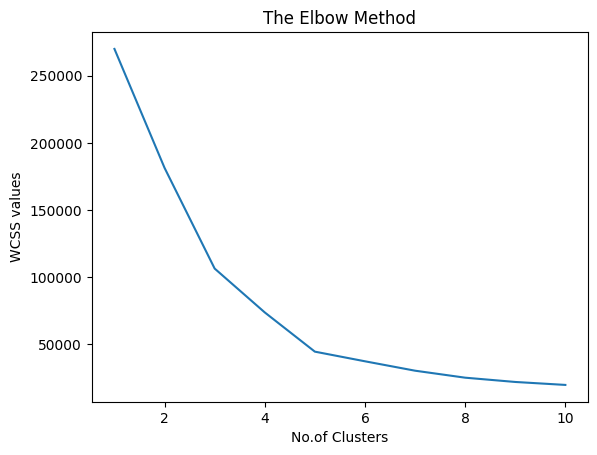

In [12]:
plt.plot(range(1,11),wcss)
plt.title("The Elbow Method")
plt.xlabel("No.of Clusters")
plt.ylabel("WCSS values")
plt.show()

# 3. Training our K-Means model using the Unsupervised Learning Algorithm (K-Means).
Initializing our K-Means model with selected optimal No. of clusters

Plot of clusters, and gain intutions regarding our customers

In [13]:
kmeansmodel= KMeans(n_clusters = 5, init='k-means++',random_state=0)

In [14]:
y_kmeans = kmeansmodel.fit_predict(X)

l:\Prodigy Internship\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


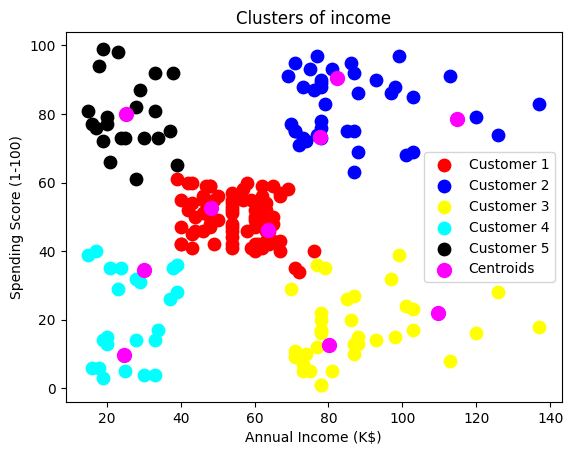

In [17]:
plt.scatter(X[y_kmeans == 0,0], X[y_kmeans == 0,1], s=80, c="red", label='Customer 1')
plt.scatter(X[y_kmeans == 1,0], X[y_kmeans == 1,1], s=80, c="blue", label='Customer 2')
plt.scatter(X[y_kmeans == 2,0], X[y_kmeans == 2,1], s=80, c="yellow", label='Customer 3')
plt.scatter(X[y_kmeans == 3,0], X[y_kmeans == 3,1], s=80, c="cyan", label='Customer 4')
plt.scatter(X[y_kmeans == 4,0], X[y_kmeans == 4,1], s=80, c="black", label='Customer 5')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100,c="magenta",label="Centroids")
plt.title("Clusters of income")
plt.xlabel("Annual Income (K$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.show()